Assignment 14

Load wine quality dataset and visualize it. Visualize the data using scatter plots for selected features. Compute basic statistics (mean, median, range, etc.) for each feature. Normalize or standardize the dataset. Handle any missing data by imputation or removal. Implementation of the K-Medoids algorithm use an existing library (e.g., scikit-learn-extra). Run the algorithm on the dataset with different values of k(e.g., k=2,3,4). Find optimal number of clusters. Compare the performance of K-Medoids with K-Means on the same dataset over optimal number of clusters

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "5"

In [4]:
df=pd.read_csv(r"C:\Users\SASWATA\OneDrive\Desktop\ML_PRAC\ML_PRAC\WineQT.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


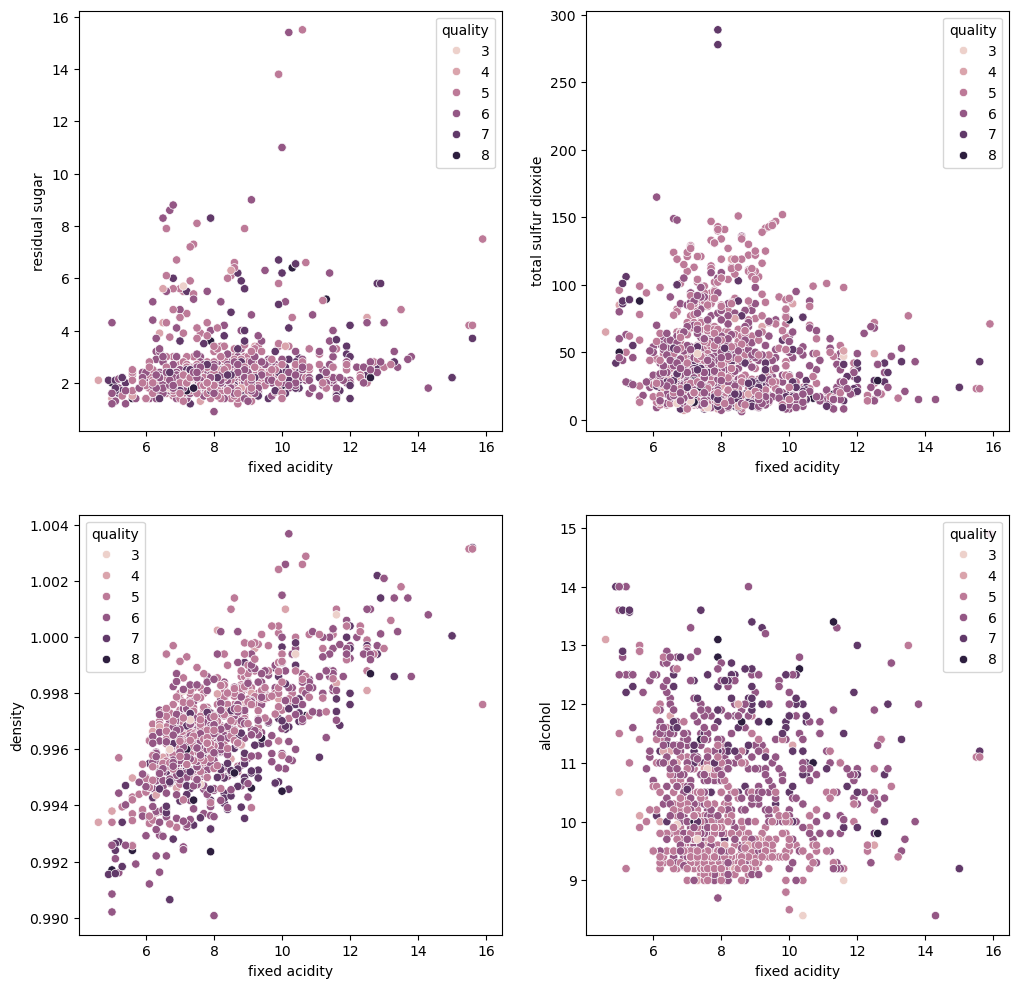

In [8]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.scatterplot(data=df,x='fixed acidity',y='residual sugar',hue='quality')
plt.subplot(2,2,2)
sns.scatterplot(data=df,x='fixed acidity',y='total sulfur dioxide',hue='quality')
plt.subplot(2,2,3)
sns.scatterplot(data=df,x='fixed acidity',y='density',hue='quality')
plt.subplot(2,2,4)
sns.scatterplot(data=df,x='fixed acidity',y='alcohol',hue='quality')
plt.show()

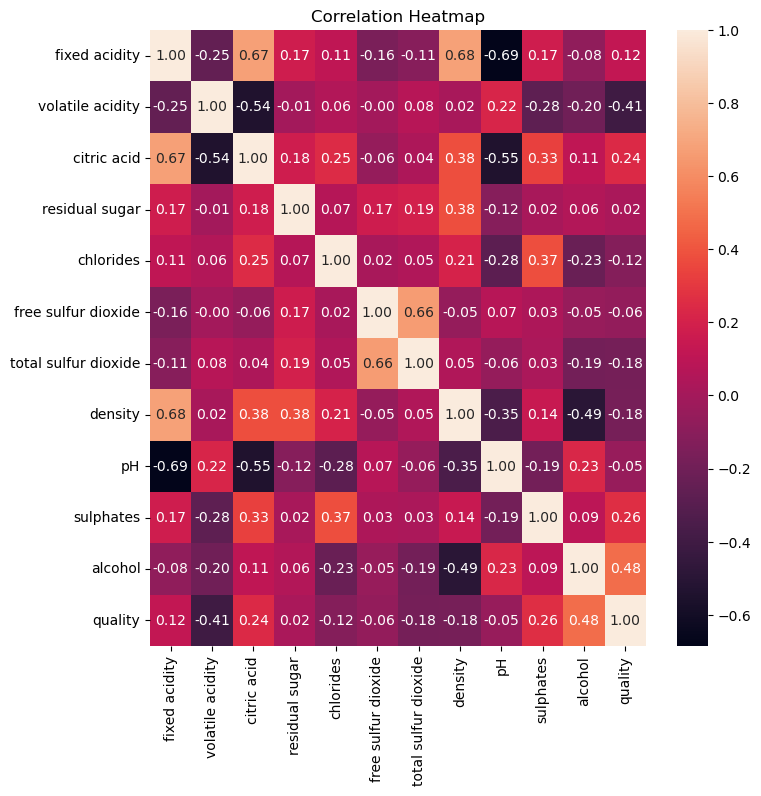

In [9]:
corr=df.iloc[:,:-1].corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr,annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scale=StandardScaler()

In [13]:
x=df.iloc[:,:-2].values
y=df.iloc[:,-2].values

In [14]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.2  ,  0.6  ,  0.08 , ...,  3.45 ,  0.58 , 10.5  ],
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ]])

In [15]:
y

array([5, 5, 5, ..., 5, 6, 5], dtype=int64)

In [16]:
x=scale.fit_transform(x)

In [17]:
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans

In [18]:
from sklearn.metrics import silhouette_score
k_values = [2, 3, 4, 5, 6, 7, 8, 9]
k_medoids_inertia={}
k_means_inertia={}
k_medoids_silhouette={}
k_means_silhouette={}
for i, k in enumerate(k_values):
    km = KMedoids(n_clusters=k)
    km.fit(x)
    labels = km.labels_
    km1 = KMeans(n_clusters=k)
    km1.fit(x)
    labels1 = km.labels_
    k_medoids_inertia[k]=km.inertia_
    k_means_inertia[k]=km1.inertia_
    k_medoids_silhouette[k]=silhouette_score(x,labels)
    k_means_silhouette[k]=silhouette_score(x,labels1)

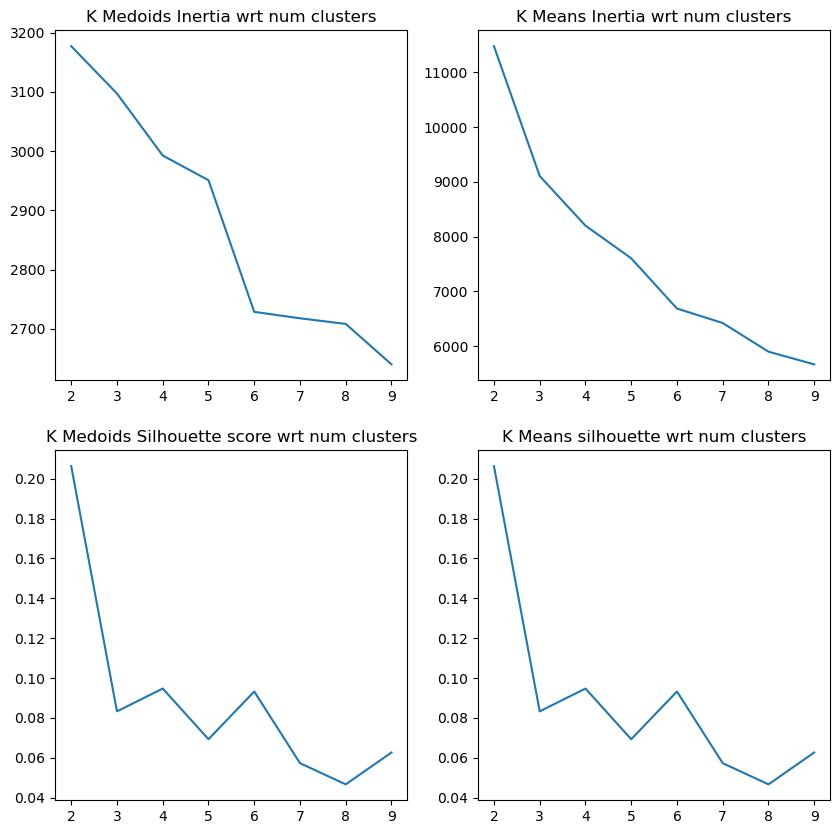

In [50]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(k_medoids_inertia.keys(),k_medoids_inertia.values())
plt.title("K Medoids Inertia wrt num clusters")
plt.subplot(2,2,2)
plt.plot(k_means_inertia.keys(),k_means_inertia.values())
plt.title("K Means Inertia wrt num clusters")
plt.subplot(2,2,3)
plt.plot(k_medoids_silhouette.keys(),k_medoids_silhouette.values())
plt.title("K Medoids Silhouette score wrt num clusters")
plt.subplot(2,2,4)
plt.plot(k_means_silhouette.keys(),k_means_silhouette.values())
plt.title("K Means silhouette wrt num clusters")
plt.show()

In [52]:
optimal_clusters=5

In [54]:
km = KMedoids(n_clusters=5)
km.fit(x)
labels = km.labels_
km1 = KMeans(n_clusters=5)
km1.fit(x)
labels1 = km.labels_
k_medoids_inertia=km.inertia_
k_medoids_silhouette=silhouette_score(x,labels)
k_means_inertia=km1.inertia_
k_means_silhouette=silhouette_score(x,labels1)
print(f'For k mediods ineratia is {k_medoids_inertia} and silhouette score is {k_medoids_silhouette}')
print(f'For k means ineratia is {k_means_inertia} and silhouette score is {k_means_silhouette}')

For k mediods ineratia is 2950.919150275595 and silhouette score is 0.06928441513731869
For k means ineratia is 7602.287299708053 and silhouette score is 0.06928441513731869


In [ ]:
we choose k medoids lower inertia better clustering